提取第一行第一列中的内容，区分数字部分和文字部分，将数字部分暂存在变量Voltage中。
同样的提取第一行第二列和第一行第三列的数字部分，分别存储在变量multiple和rpm中。
删除.mat文件中的前两行，将每一行的后三列分别填充变量Voltage、multiple和rpm中的变量。

In [2]:
import os
import re
import pandas as pd

# 设定.csv文件所在的目录
csv_directory = 'PI_data_16-20_csv'

# 正则表达式用于提取文件名中的数字部分
def extract_numbers_from_filename(filename):
    numbers = re.findall(r'\d+\.?\d*', filename)
    return [float(num) for num in numbers] if numbers else [None] * 4  # 返回4个数字

# 获取.csv文件
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# 批量处理.csv文件
for csv_file in csv_files:
    # 提取文件名中的数字部分
    # 假设文件名包含数字，按照顺序表示 Voltage, multiple, k, rpm
    numbers = extract_numbers_from_filename(csv_file)
    if len(numbers) >= 4:
        Voltage, multiple, k, rpm = numbers[:4]  # 获取前四个数值
    else:
        print(f"File name {csv_file} does not contain enough numbers.")
        continue
    
    # 读取.csv文件
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path, header = 1)
    
    # 删除第一行
    df = df.drop([0])
    df = df.iloc[:, 0:3]
    
    # 插入前四列
    df.insert(loc=0, column='Voltage', value=Voltage)
    df.insert(loc=1, column='multiple', value=multiple)
    df.insert(loc=2, column='k', value=k)
    df.insert(loc=3, column='rpm', value=rpm)

    # 保存修改后的.csv文件
    csv_modified_file = file_path.replace('.csv', '_modified.csv')
    csv_modified_file = csv_modified_file.replace(csv_directory, 'modified')
    df.to_csv(csv_modified_file, index=False)
    
    print(f"Processed {csv_file} -> {csv_modified_file}")

Processed 680V_16x_5k_60rpm.csv -> modified\680V_16x_5k_60rpm_modified.csv
Processed 680V_17x_5k_60rpm.csv -> modified\680V_17x_5k_60rpm_modified.csv
Processed 680V_18x_5k_60rpm.csv -> modified\680V_18x_5k_60rpm_modified.csv
Processed 680V_19x_5k_70rpm.csv -> modified\680V_19x_5k_70rpm_modified.csv
Processed 680V_20x_5k_70rpm.csv -> modified\680V_20x_5k_70rpm_modified.csv
Processed 690V_16x_5k_60rpm.csv -> modified\690V_16x_5k_60rpm_modified.csv
Processed 690V_17x_5k_60rpm.csv -> modified\690V_17x_5k_60rpm_modified.csv
Processed 690V_18x_5k_60rpm.csv -> modified\690V_18x_5k_60rpm_modified.csv
Processed 690V_19x_5k_70rpm.csv -> modified\690V_19x_5k_70rpm_modified.csv
Processed 690V_20x_5k_70rpm.csv -> modified\690V_20x_5k_70rpm_modified.csv
Processed 700V_16x_5k_60rpm.csv -> modified\700V_16x_5k_60rpm_modified.csv
Processed 700V_17x_5k_60rpm.csv -> modified\700V_17x_5k_60rpm_modified.csv
Processed 700V_18x_5k_60rpm.csv -> modified\700V_18x_5k_60rpm_modified.csv
Processed 700V_19x_5k_70r

In [3]:
import pandas as pd
import os

# 设定包含csv文件的目录路径
directory = 'modified'  # 请替换为存放CSV文件的路径

# 创建一个空的DataFrame用于存放汇总后的数据
all_data = pd.DataFrame()

# 遍历目录中的所有CSV文件
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        # 读取每个CSV文件
        df = pd.read_csv(file_path)
        # 将数据追加到all_data中
        all_data = pd.concat([all_data, df], ignore_index=True)

# 将汇总后的数据保存到新的CSV文件中
all_data.to_csv('all_data.csv', index=False)

# 打印完成提示
print("所有CSV文件数据汇总完成并保存为'all_data.csv'")

所有CSV文件数据汇总完成并保存为'all_data.csv'


In [4]:
import pandas as pd

# 更新multiple 6-15数据
new_data = pd.read_excel('PI_Data_6-15_cleaned.xlsx')
data={
    'Voltage' : new_data.iloc[:,0],
    'multiple' : new_data.iloc[:,1],
    'k' : new_data.iloc[:,4],
    'rpm' : new_data.iloc[:,2],
    'P' : new_data.iloc[:,5],
    'I' : new_data.iloc[:,6],
    'Stop Duration' : new_data.iloc[:,7]
}
new_data_new = pd.DataFrame(data)
new_data_new.to_csv('PI_Data_6-15_standardized.csv',index=False)
all_data = pd.concat([all_data, new_data_new], ignore_index=True)
all_data.to_csv('all_data.csv', index=False)

In [5]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('all_data.csv')

# 删除最后一列中值为0的行
df_cleaned = df[df.iloc[:, -1] != 0]

# 保存到一个新的 CSV 文件中
df_cleaned.to_csv('cleaned_file.csv', index=False)

In [1]:
import pandas as pd
DF = pd.read_csv('cleaned_file.csv')

for i in range(6):
    tmp = list(DF.iloc[:,i])
    tmp.sort()
    st = set(tmp)
    for j in st:
        print(j, end=' ')
    print()


770.0 740.0 710.0 680.0 780.0 750.0 720.0 690.0 760.0 730.0 700.0 
7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 
1.6 2.0 2.2 1.8 2.4 2.6 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 
70.0 40.0 20.0 60.0 30.0 
130 5 135 10 140 15 145 20 150 25 155 30 160 35 165 40 170 45 175 50 180 55 185 60 190 65 195 70 200 75 80 85 90 95 100 105 110 115 120 125 
0.019953 0.12589 0.31623 0.39811 0.63096 0.25119 0.50119 0.79433 1.0 1.2589 1.5849 2.5119 3.1623 5.0119 0.039811 0.063096 3.9811 0.050119 0.079433 0.1 0.15849 0.19953 0.025119 0.012589 0.031623 0.01 1.9953 0.015849 


In [2]:
def relativeErrors(test, pred):
    max_relative_error = 0
    mean_relative_error = 0
    for i in range(len(test)):
        max_relative_error = max(max_relative_error, abs(test[i]-pred[i])/test[i])
        mean_relative_error += abs(test[i]-pred[i])/test[i]
    mean_relative_error /= len(test)
    return max_relative_error, mean_relative_error

In [3]:
def sortTestPred(test, pred):
    for i in range(len(test)):
        for j in range(i, len(test)):
            if test[i]>test[j] or (test[i]==test[j] and pred[i]>pred[j]):
                test[i], test[j] = test[j], test[i]
                pred[i], pred[j] = pred[j], pred[i]
    return (test, pred)
                

In [4]:
## 神经网络-随机森林回归 RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# 1. 加载CSV数据
data = pd.read_csv('cleaned_file.csv')

# 2. 假设特征在data的前几列，标签在最后一列
X = data.iloc[:, :-1].values  # 输入特征
y = data.iloc[:, -1].values   # 输出标签

# 3. 数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
'''
parameter_grid = {
    'max_depth': [19, 16, 18, 17, None],
    'max_features': [4, 5],
    'random_state': [0]
}
random_forest_regressor = RandomForestRegressor()
grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=parameter_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
'''

# 4. 构建Random Forest回归模型
random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=17, max_features=5, random_state=0)

# 5. 训练模型
random_forest_regressor.fit(X_train, y_train)
#grid_search.fit(X_train, y_train)

# 6. 进行预测
y_pred = random_forest_regressor.predict(X_test)

# 7. 评估模型 
mse = mean_squared_error(y_test, y_pred)
print(f"均方误差: {mse}")
max_relative_error, mean_relative_error= relativeErrors(y_test, y_pred)
print(f"最大相对误差：{max_relative_error}")
print(f"平均相对误差：{mean_relative_error}")
r2 = r2_score(y_test, y_pred)
print(f"r2得分：{r2}")

y_test_list,y_pred_list = sortTestPred(list(y_test), list(y_pred))


'''
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validated accuracy:", best_score)
'''


均方误差: 0.0014442961778749937
最大相对误差：0.43793793985924473
平均相对误差：0.02931915959659271
r2得分：0.9531912018743106


'\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint("Best parameters:", best_params)\nprint("Best cross-validated accuracy:", best_score)\n'

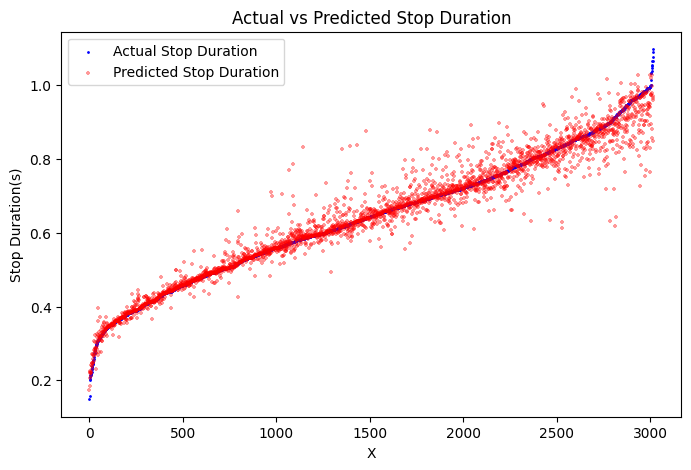

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(list(range(len(y_test_list))), y_test_list, color='blue', s=1)
plt.scatter(list(range(len(y_pred_list))), y_pred_list, color='red', s=5, alpha=0.4, marker='+')
plt.xlabel('X')
plt.ylabel('Stop Duration(s)')
plt.title('Actual vs Predicted Stop Duration')
plt.legend(['Actual Stop Duration','Predicted Stop Duration'])
plt.show()

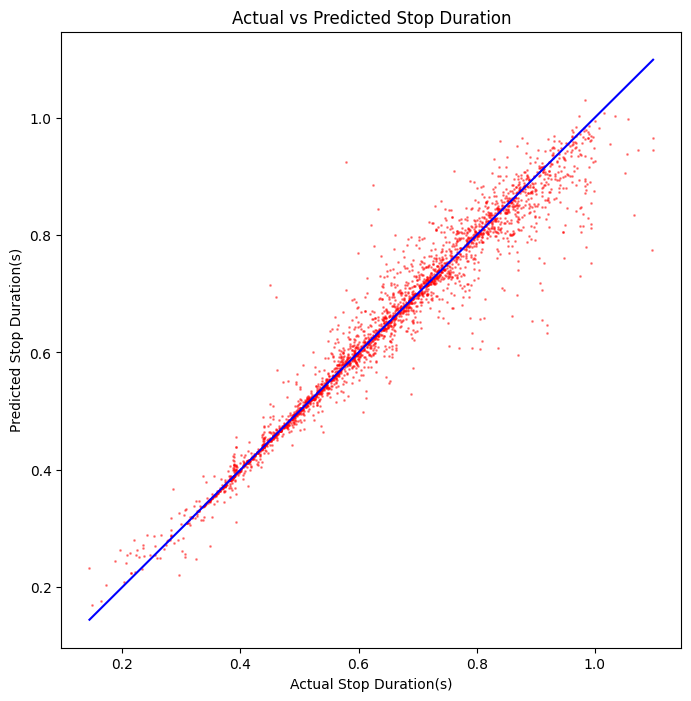

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))
plt.scatter(y_test_list, y_pred_list, color='red', s=1, alpha=0.4)
plt.plot(y_test_list, y_test_list, color='blue')
plt.xlabel('Actual Stop Duration(s)')
plt.ylabel('Predicted Stop Duration(s)')
plt.title('Actual vs Predicted Stop Duration')
plt.show()

 99%|===================| 2994/3016 [01:36<00:00]        

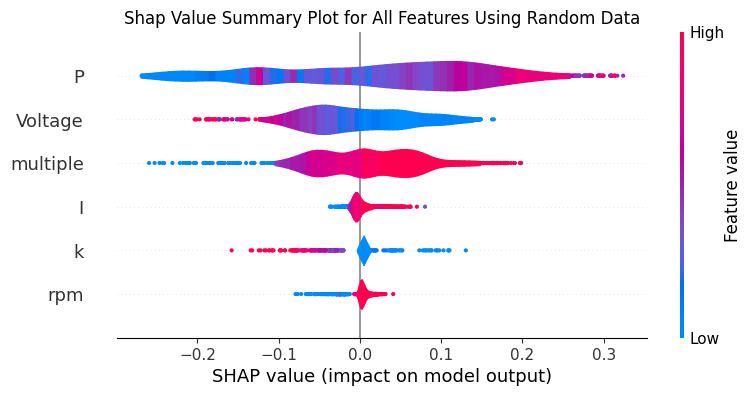

In [15]:
import shap
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import numpy as np
'''
X_test_dic = {
    'Voltage': X_test[0,:],
    'multiple': X_test[1,:],
    'k': X_test[2,:],
    'rpm': X_test[3,:],
    'P': X_test[4,:],
    'I': X_test[5,:]
}
'''
features_names = ['Voltage', 'multiple', 'k', 'rpm', 'P', 'I']
explainer = shap.TreeExplainer(random_forest_regressor, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=features_names, plot_type='violin', show=False)
plt.title('Shap Value Summary Plot for All Features Using Random Data')
plt.show()

C:\Users\World\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\World\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\World\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.3097162930588855
0.32277221000000017
0.34171245921245424
0.3433548149999997


C:\Users\World\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\World\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.3551982435497839


100%|===================| 14997/15000 [09:26<00:00]        

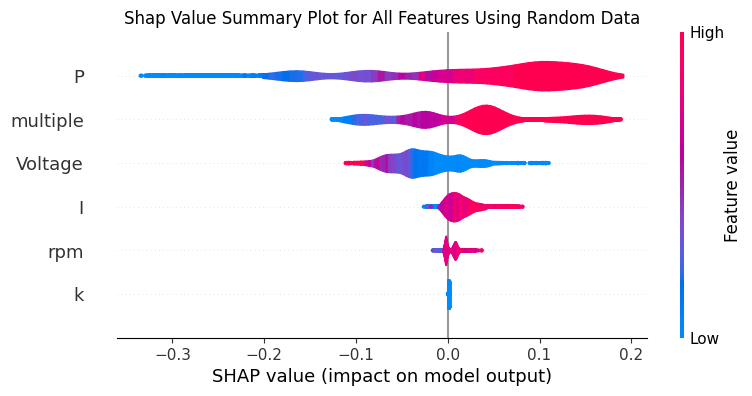

In [39]:
import numpy as np

data_vide = {
    'Voltage' : [],
    'multiple' : [],
    'k' : [],
    'rpm' : [],
    'P' : [],
    'I' : [],
    'Stop Duration' : []
}
tot = pd.DataFrame()

def generate_array(n):
    # 第一列 [710, 780] 范围内的随机值
    col1 = np.random.uniform(710, 780, n)
    col2 = np.full(n, cur_multiple)
    col3 = np.full(n, 5) 
    # 第四列 [60, 70] 范围内的随机值
    col4 = np.random.uniform(60, 70, n)
    
    # 第五列 [5, 50] 范围内的随机值
    col5 = np.random.uniform(5, 50, n)
    
    # 第六列 [0, 1] 范围内的随机值
    col6 = np.random.uniform(0.01, 5.0119, n)
    
    # 将所有列拼接为一个数组
    array = np.column_stack((col1, col2, col3, col4, col5, col6))
    
    return array
def generate_df(n):
    random_data = {
        'Voltage': np.random.uniform(710, 780, n),
        'multiple': np.full(n, cur_multiple),
        'k': np.full(n, 5),
        'rpm': np.random.uniform(60, 70, n),
        'P': np.random.uniform(5, 50, n),
        'I': np.random.uniform(0.01, 5.0119, n)
    }
    return pd.DataFrame(random_data)
for cur_multiple in range(16,21):
    # 生成 n 行数组
    n = 3000  # 示例行数
    result = generate_df(n)
    tot = pd.concat([tot, result],ignore_index=True)
    V = result['Voltage']
    rpm = result['rpm']
    P = result['P']
    I = result['I']
    z = random_forest_regressor.predict(result)
    a = np.where(z == min(z))
    print(min(z))
    data = {
        'Voltage': V[a[0]],
        'multiple': cur_multiple,
        'k': 5,
        'rpm': rpm[a[0]],
        'P': P[a[0]],
        'I': I[a[0]],
        'Stop Duration': min(z)
    }

    df = pd.DataFrame(data)
    df.to_csv('Results\\Multiple'+str(cur_multiple)+'.csv', index=False, sep=',')

import shap
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

features_names = ['Voltage', 'multiple', 'k', 'rpm', 'P', 'I']
explainer = shap.TreeExplainer(random_forest_regressor, X_train)
shap_values = explainer(tot)
shap.summary_plot(shap_values, tot, feature_names=features_names, plot_type='violin', show=False)
plt.title('Shap Value Summary Plot for All Features Using Random Data')
plt.show()

In [41]:
tot.to_csv("all_random_data.csv",index=False)

In [47]:
tot

,Voltage,multiple,k,rpm,P,I
0,720.548741,16,5,66.357101,38.998508,3.712255
1,760.223566,16,5,61.615743,35.313405,2.206954
2,733.887572,16,5,67.672408,25.843687,3.250030
3,730.769656,16,5,68.513541,36.349554,4.288659
4,761.595248,16,5,69.434813,37.793643,0.390059
...,...,...,...,...,...,...
14995,726.571669,20,5,66.947212,7.554544,4.421418
14996,714.132250,20,5,69.561163,39.200882,1.324866
14997,778.381460,20,5,66.770648,18.742212,2.225973
14998,727.757262,20,5,68.823818,27.553357,3.825941
